<a href="https://colab.research.google.com/github/Rico-le-champion/Deep-Learning-Time-series/blob/main/Copie_de_TS_Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction:**
A time series is time-indexed data. Time series are now everywhere and companies are often required to process them. For example, the analysis of time series will be useful to the company to forecast sales, product inventory or production to ensure that it meets its objectives.

Despite this need, companies often lack the resources to be able to process all the usable time series data they have at their disposal at scale. However, this situation is now changing thanks to new open source tools that allow them to obtain good results without having to be an expert in the mathematical concepts on which the "classic" algorithms are based.

Because of their maturity and their feedback, we have selected two main tools: Prophet and DeepAR that we detail below.

# **Data importation**

To illustrate the performance of Prophet and DeepAR, we have chosen an open source dataset from the Kaggle "M4 Forecasting" competition (hour by hour). This dataset contains 414 time series (observed every hour). 

We compared 3 different algorithms: DeepAR, Prophet and SARIMA, a more classical statistical model. These three models were trained with time series observed over 960 hours. Their performance was measured over 48 hours of prediction by the mean absolute percentage error (sMAPE).


In [ ]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
from matplotlib import pyplot as plt
import datetime
from math import sqrt
test=pd.read_csv('Hourly-test.csv')
train=pd.read_csv('Hourly-train.csv')

In [ ]:
def MASE(train,test,pred):
  n = train.shape[0]
  d = np.abs(np.diff(train)).sum()/(n-1)
  errors = np.abs(test-pred)
  return errors.mean()/d

def sMAPE(train,test,pred):
  a = np.abs(test-pred)
  b = (np.abs(test)+np.abs(pred))/2
  c = np.mean(a/b)*100
  return c

## **SARIMA**

SARIMA is a very well-known statistical model very efficient to model time Series. It has 3 parameters that need to be fitted to each of the times series. The first one corresponds to the number of times the series needs to be differentiated to be stationary. The two other one corresponds to what kind of Autoregressive and Moving average processes it is. Once these parameters are fixed you can predict the model. And in theory it is efficient.

In [18]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [20]:
RNB2=np.zeros(test.shape[0])
metric=np.zeros(test.shape[0])


for i in range(test.shape[0]):
  TS=train.iloc[i,1:].dropna().astype('int')
  true_pred=np.asarray(test.iloc[i,1:].dropna().astype('int').reset_index())[:,1]
  d=0 #Nombre de différentiation à faire pour atteindre la stationnarité
  while (adfuller(TS)[1]>0.05):#Test de stationnarité
    TS=TS.diff().dropna()
    d=d+1

  #Recherche des paramètres otpimaux pour modéliser la TS par un modèle ARIMA selon le critère AIC 
  min=1e9
  p=0
  q=0
  for k in range (0,6):
    for l in range (0,6):
      try:
        model = ARIMA(np.asarray(train.iloc[i,1:].dropna().astype('int')), order=(k,d,l))
        model_fit=model.fit(disp=0)
        if (model_fit.aic<min):
          min=model_fit.aic
          p=k
          q=l
      except:
          pass

  #Création du modèle
  model = ARIMA(np.asarray(train.iloc[i,1:].dropna().astype('int')), order=(p,d,q))
  model_fit=model.fit(disp=0)

  forecast=model_fit.forecast(48)#prédiction

  #Calcul des métriques
  metric[i]=sMAPE(train,forecast[0],true_pred)
  RNB2[i]=metric[i]/13.564
  print("done",test.shape[0]-i)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-pa

done 414
done 413


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 412


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/stats

done 411
done 410


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 409


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:695: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:649: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning:

divide by zero encountered in arctanh



done 408


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning:

invalid value encountered in arctanh



done 407


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 406


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 405


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 404
done 403


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 402


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packag

done 401
done 400


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/stats

done 399


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 398
done 397


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 396


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 395
done 394


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dis

done 393
done 392


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 391


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 390


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 389
done 388


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 387
done 386


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsato

done 385


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 384


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 383


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/stats

done 382


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dis

done 381
done 380


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/stats

done 379


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 378


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 377


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 376
done 375


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 374


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 373


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/mode

done 372


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/mode

done 371
done 370


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/stats

done 369


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 368


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 367


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/stats

done 366


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 365


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 364
done 363


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packag

done 362


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 361


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 360
done 359


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 358
done 357


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 356


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 355
done 354
done 353


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 352


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/stats

done 351


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:693: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: He

done 350
done 349
done 348


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/stats

done 347
done 346


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 345


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 344
done 343


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 342
done 341


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 340
done 339


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 338


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 337
done 336


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 335


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 334


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 333


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 332
done 331


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 330


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 329


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 328
done 327


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 326


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 325
done 324


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 323


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 322


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 321


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 320


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packag

done 319


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/stats

done 318


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 317


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 316
done 315


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 314


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 313


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 312
done 311
done 310
done 309


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 308
done 307


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 306


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 305


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 304


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 303


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 302


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 301
done 300


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 299


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 298


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 297
done 296


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 295


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/mode

done 294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/stats

done 293
done 292
done 291
done 290


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 289
done 288


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 287
done 286
done 285


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 284


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 283
done 282


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 281


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 280
done 279


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 278
done 277


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 276
done 275
done 274


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 273


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 272


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 271


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 270
done 269
done 268


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 267


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 266
done 265


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 264
done 263


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 262
done 261


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 260


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 259


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 258
done 257
done 256
done 255


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 254
done 253
done 252
done 251
done 250


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 249


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 248
done 247
done 246
done 245


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 244
done 243
done 242
done 241
done 240
done 239
done 238
done 237
done 236
done 235
done 234


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 233
done 232
done 231
done 230
done 229
done 228


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 227
done 226
done 225
done 224
done 223
done 222
done 221
done 220
done 219
done 218
done 217
done 216
done 215
done 214
done 213
done 212
done 211
done 210
done 209
done 208
done 207
done 206
done 205
done 204
done 203
done 202
done 201
done 200
done 199
done 198
done 197
done 196
done 195
done 194
done 193


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 192
done 191
done 190
done 189
done 188
done 187
done 186
done 185
done 184
done 183
done 182
done 181
done 180
done 179


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 178
done 177
done 176


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 175


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 174


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/mode

done 173
done 172


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 171
done 170
done 169
done 168
done 167
done 166
done 165
done 164
done 163
done 162
done 161
done 160
done 159
done 158
done 157
done 156
done 155
done 154


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 153
done 152
done 151
done 150
done 149


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 148
done 147
done 146
done 145


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 144


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 143
done 142
done 141
done 140
done 139
done 138
done 137


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 136
done 135
done 134
done 133
done 132
done 131
done 130
done 129
done 128
done 127


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 126
done 125
done 124
done 123
done 122
done 121
done 120
done 119
done 118
done 117
done 116
done 115
done 114
done 113
done 112
done 111
done 110
done 109
done 108
done 107
done 106
done 105
done 104
done 103
done 102
done 101
done 100
done 99
done 98
done 97
done 96
done 95


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 94
done 93
done 92
done 91
done 90
done 89
done 88
done 87


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 86


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 85


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 84


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 83


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 82
done 81


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 80


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 79


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 78


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/stats

done 77


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 76


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 75


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/stats

done 74


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 73


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 72


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 71


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 70


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packag

done 69
done 68


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 67


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 66


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packag

done 65
done 64


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 63


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/stats

done 62


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/mode

done 61


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 60


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 59


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 58


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 57
done 56
done 55


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/stats

done 54


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 53


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 52


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/stats

done 51
done 50


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 49


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 48


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 47
done 46


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 45
done 44


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 43


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 42


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 41


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 40


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 39


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 38


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 37


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 36


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/stats

done 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 34
done 33


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 32


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 31


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/mode

done 30
done 29


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/stats

done 28
done 27


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 26


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 25


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 24
done 23


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/mode

done 22


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 21


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 20


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/mode

done 19


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 18


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 17


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 16


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/mode

done 15


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 14


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 13


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/stats

done 12


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 11


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 10


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 9
done 8


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/stats

done 7


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/mode

done 6


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 5


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



done 4
done 3


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/b

done 2


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



done 1


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [22]:
np.mean(metric)

29.39427676819107

In [23]:
np.mean(RNB2)

2.1670802689613

# **Prophet**

Prophet is a tool developed by Facebook to democratize and simplify time series forecasts. This model is particularly suitable for business-type time series affected by events or seasonalities linked to human activity (e.g.: end of the year vacations, sales, seasons, vacations, etc).

Prophet's API allows the analyst to get good results quickly with the default values and then enrich the model iteratively with business knowledge, via:

-The type of trend .

-The addition of information on seasonality, for example the explicit implementation of a different seasonality during a sports season.

-Explicit listing of events and/or vacations that may impact the predicted value.

-The parameterization of the model's regularization.

In [21]:
metric=np.zeros(test.shape[0])
RNB2=np.zeros(test.shape[0])
for i in range(test.shape[0]):

  #Preparation of the data into the format asked by Prophet
  ts=train.iloc[i,1:].dropna().astype('int')
  ts=pd.DataFrame(ts)
  ts['y']=ts[i]
  ts=ts.drop(columns={i})
  ts=ts.reset_index()
  debut = datetime.datetime(2011,1,1)
  heure_pile = ts.index[-1]+1
  u = []
  for heure in (debut+datetime.timedelta(n/24) for n in range(heure_pile)):
    u.append(heure)
  ts["ds"]=pd.DataFrame(u)
  ts["ds"]=pd.to_datetime(ts["ds"])


  #Creation of the model
  model = Prophet(); #instantiate Prophet
  #interval_width=0.95
  model.fit(ts);

  #forecast data
  future_data = model.make_future_dataframe(periods=48, freq='H')
  forecast_data = model.predict(future_data)

  pred=forecast_data['yhat'].iloc[700:748].reset_index()
  true_pred=test.iloc[i,1:].dropna().astype('int').reset_index()

  #Metrics
  metric[i]=sMAPE(train,pred['yhat'],true_pred[i])
  RNB2[i]=metric[i]/13.564
  print("done")

print(np.mean(metric),np.mean(RNB2))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


done
done
29.39427676819107 2.1670802689613


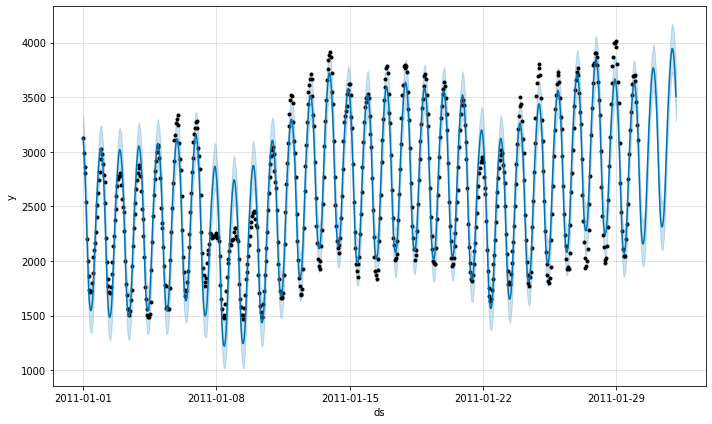

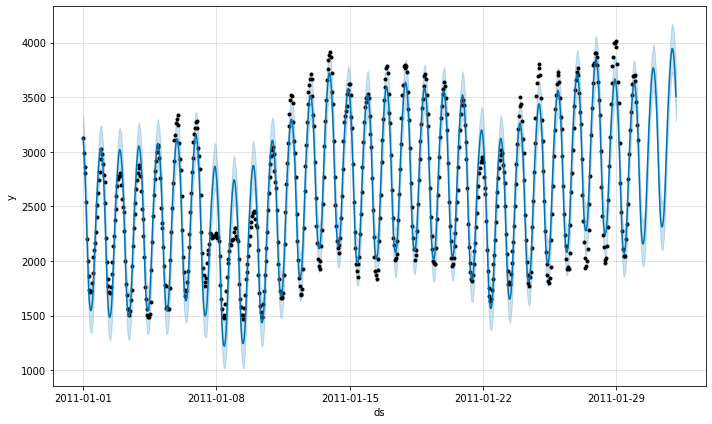

In [17]:
model.plot(forecast_data)

## **DEEP AR :** Probabilistic Forecasting with Autoregressive Recurrent Networks

The DeepAR algorithm was developed by Amazon to meet their need for predicting sales of all products by driving a single model. Indeed, products have different dynamics but the experience gained by products with a long history can benefit the prediction of sales of more recent products. It is this "turnkey" ability to train a single model on a set of time series that can learn from each other that is the great specificity of DeepAR, with the fact that the algorithm is based on deep learning. 


The installation of DeepAR is very simple :

In [ ]:
!pip install --upgrade mxnet==1.6.0
!pip install gluonts

The DeepAR model is based on a recurrent neural network  over which is added a learning layer of a probability distribution. The model calculates each prediction according to the previous values, which may themselves be predictions. It thus learns, as it goes along, the best parameters for generating the parameters of the probability distribution from the output of the RNN, noted h on the graph below:

![picture](https://drive.google.com/uc?id=1kwc03758ag1BlVKiw3Z0GrHVwQMZNIZW)

DeepAR's API is slightly more complex than Prophet's but is still very easily affordable. Data instantiation is done with the ListDataset object and then the estimator is simply trained with the train function:

In [ ]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName
from gluonts.evaluation.backtest import make_evaluation_predictions
from tqdm.autonotebook import tqdm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: gluonts.trainer is deprecated. Use gluonts.mx.trainer instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


In [ ]:
train1=train.fillna(0)
train1=train.T.reset_index(drop=True).T
train_code = train1[0].astype('category').cat.codes.values
test1=test.fillna(0)
test1=test.T.reset_index(drop=True).T
test_code = test1[0].astype('category').cat.codes.values

In [ ]:
estimator = DeepAREstimator(freq="60min",prediction_length=40,
                          use_feat_static_cat=True,cardinality=[1],
                          num_layers=4,num_cells=64,cell_type='lstm',
                          trainer=Trainer())

In [ ]:
freq="60min"
start_train = pd.Timestamp("2011-01-01 00:00:00",freq=freq)
start_test = pd.Timestamp("2011-02-09 00:00:00",freq=freq)

In [ ]:
df_train=train.drop(["V1"],axis=1)
df_train=df_train.fillna(0)
df_train = np.array(df_train)

df_test=test.drop(["V1"],axis=1)
df_test=df_test.fillna(0)
df_test = np.array(df_test)

In [ ]:
train_ds = ListDataset([
     {
     FieldName.TARGET: target,
     FieldName.START: start_train,
     FieldName.FEAT_STATIC_CAT: fsc,
     }
     for (target,fsc) in zip(df_train,train_code.reshape(-1,1))
 ],freq = freq)


test_ds = ListDataset([
     {
     FieldName.TARGET: target,
     FieldName.START: start_test,
     FieldName.FEAT_STATIC_CAT: fsc,
     }
     for (target,fsc) in zip(df_test,test_code.reshape(-1,1))
 ],freq = freq)

In [ ]:
predictor = estimator.train(training_data=train_ds)

In [ ]:
forecast_it,ts_it = make_evaluation_predictions(
    dataset = test_ds,
    predictor = predictor,
    num_samples = 100,
)

In [ ]:
print("Obteining time series conditioning values ...")
tss = list(tqdm(ts_it,total=len(df_test)))
print("Obteining time series predictions...")
forecasts = list(tqdm(forecast_it,total=len(df_test)))

Obteining time series conditioning values ...



Obteining time series predictions...


Note that the trainer parameter of the DeepAREstimator object allows to configure the RNN of the model very precisely.

The prediction is done via the make_evaluation_prediction function provided by the package, which takes as argument num_eval_samples which corresponds to the number of simulations that the model will calculate to sample the probability distributions.

In [ ]:
def plot_prob_forecasts(ts_entry,forecast_entry):
  plot_lenght = 40
  prediction_intervals = (80.0,95.0)
  legend = ["observations","median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

  fig,ax = plt.subplots(1,1,figsize=(10,7))
  ts_entry[-plot_lenght:].plot(ax=ax)
  forecast_entry.plot(prediction_intervals=prediction_intervals,color='g')
  plt.grid(which="both")
  plt.legend(legend,loc="upper left")
  plt.show()

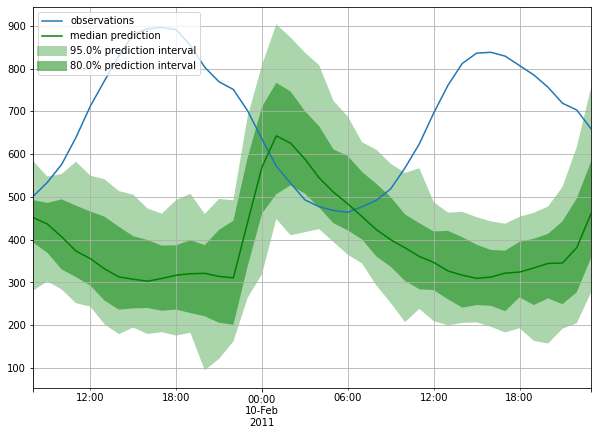

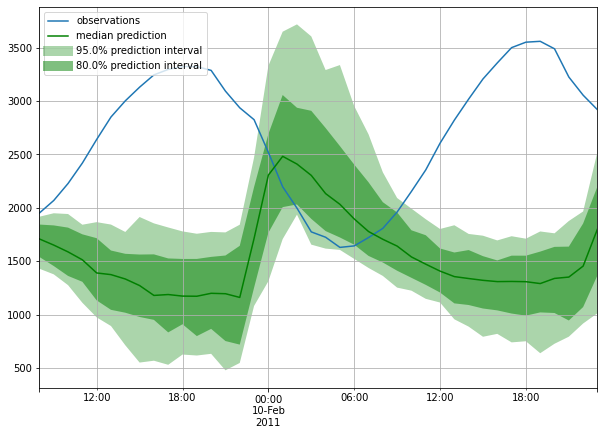

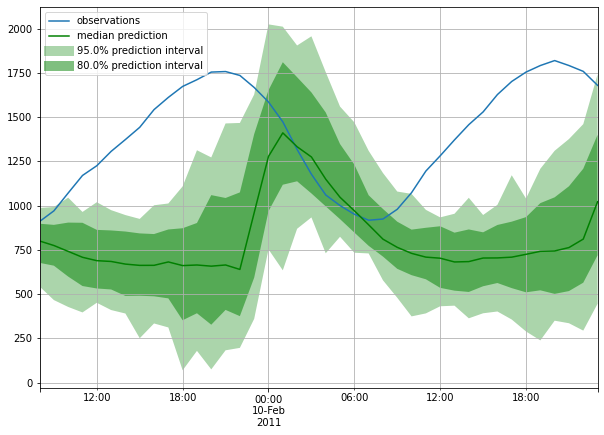

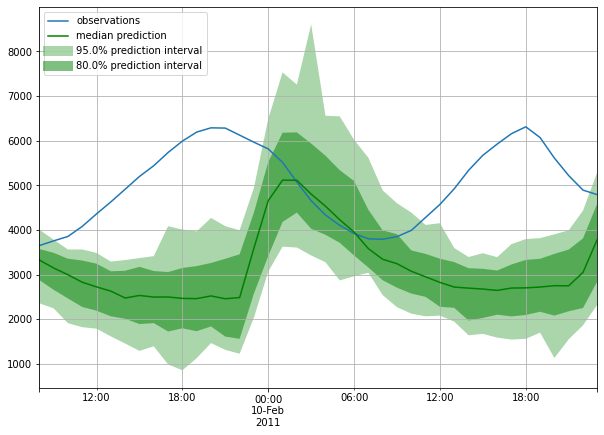

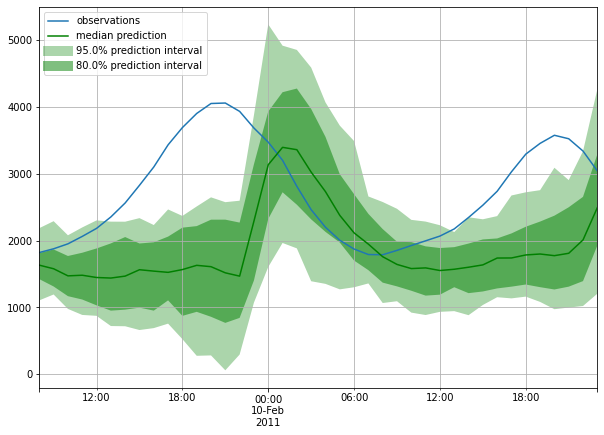

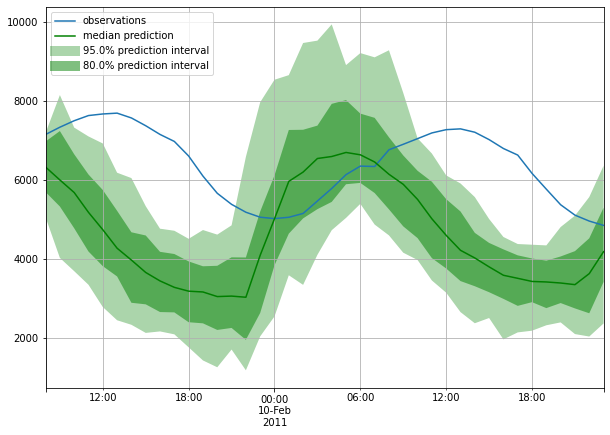

In [ ]:
for i in tqdm(range(6)):
  ts_entry = tss[i]
  forecast_entry = forecasts[i]
  plot_prob_forecasts(ts_entry,forecast_entry)

In [ ]:
from gluonts.evaluation import Evaluator 
evaluator = Evaluator(quantiles=[0.1,0.5,0.9])
agg_metrics,item_metrics  = evaluator(iter(tss),iter(forecasts),num_series=len(df_test))

In [ ]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,NaN,1.340815e+05,12583.383789,27524.0,688.100,24.714286,12.728856,0.416398,0.566041,NaN,295.969066,3028.998840,0.025,12583.383484,0.150,16951.231781,0.225
1,NaN,2.143770e+06,49962.238281,107394.0,2684.850,141.000000,8.858553,0.423421,0.569046,NaN,236.718551,12154.613135,0.125,49962.238403,0.175,70146.139136,0.225
2,NaN,4.935582e+05,23990.277344,56126.0,1403.150,81.285714,7.378381,0.392093,0.527763,NaN,140.120063,6255.756201,0.000,23990.276550,0.125,29401.527844,0.225
3,NaN,5.295536e+06,75866.335938,201156.0,5028.900,241.142857,7.865290,0.350259,0.461437,NaN,180.021582,20135.234912,0.000,75866.337402,0.125,100372.086719,0.225
4,NaN,1.506410e+06,39763.226562,109944.0,2748.600,283.428571,3.507341,0.326614,0.411007,NaN,52.431834,10954.720459,0.000,39763.223755,0.175,41602.691919,0.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,NaN,7.856258e+03,3274.191406,5154.0,128.850,21.428571,3.819890,0.609453,0.861263,NaN,15.370331,990.262321,0.100,3274.191353,0.225,2709.753731,0.500
410,NaN,4.294793e+03,2473.844971,4340.0,108.500,37.285714,1.658708,0.592747,0.691130,NaN,8.932463,960.771905,0.125,2473.844944,0.350,1135.415393,0.775
411,NaN,4.354867e+03,1892.450684,2978.0,74.450,13.571429,3.486093,0.581913,0.795279,NaN,50.358322,572.006284,0.100,1892.450674,0.300,1943.916896,0.575
412,NaN,1.930573e+03,1302.558594,1906.0,47.650,4.428571,7.353153,0.559318,0.810187,NaN,254.922033,328.986028,0.200,1302.558567,0.300,2099.682174,0.325


DeepAR traine a single model on a set of time series it takes as input a matrix containing all the time series, in our case the series do not have the same sizes (contrary to the use of prophet where we remove the NANs here we replace them with 0) this explains the very low sMAPE values obtained in the table above (this metric is therefore not comparable to the sMAPE calculated for prophet).

# **Conclusion:**

It is clear that the efforts made by web giants to democratize the analysis of time series have borne fruit by allowing data scientists who do not necessarily have the mathematical expertise necessary to use models like SARIMA to very quickly arrive at usable results. The following table summarizes the main differences between Prophet and Deepar:

![picture](https://drive.google.com/uc?id=1EdHcDllht8wOmz86NLzdcATJwJUDZYLA) 